In [130]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import os

In [2]:
with open('HarryPotter/Book1.txt', 'r', encoding='utf-8') as f:
    lines = f.read()
#     lines = f.readlines()[4:]
#     triples = [line.split("\t") for line in lines]
#     triples = [[triple[0],triple[2]] for triple in triples]

In [2]:
# lines

In [4]:
for dirname, _, filenames in os.walk('HarryPotter'):
    print(_)
    for filename in filenames:
        print(os.path.join(dirname, filename))

[]
HarryPotter\1.csv
HarryPotter\Book1.txt
HarryPotter\Book2.txt
HarryPotter\Book3.txt
HarryPotter\Book4.txt
HarryPotter\Book5.txt
HarryPotter\Book6.txt
HarryPotter\Book7.txt
HarryPotter\characters_list.csv
HarryPotter\harrypotterkgdata.csv
HarryPotter\translatedCSV.csv


In [3]:
import spacy
import re
# import pyvis
import networkx as nx
import matplotlib.pyplot as plt
from spacy import displacy
# import community as community_louvain
nlp = spacy.load("en_core_web_sm")


D:\anaconda3\lib\site-packages\spacy\util.py:833: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.2.3). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [4]:
from dataclasses import dataclass

@dataclass
class Book:
    book: str
    text: str
        
bookList = ["Book1","Book2", "Book3","Book4","Book5", "Book6", "Book7"]
bookdata= []
for b in bookList:
    bookdata.append(Book(book = b,text = open("HarryPotter/"+b+".txt", encoding='utf-8').read()))

In [5]:
all_book = ''
for i in bookdata:
    all_book += i.text

In [6]:
len(all_book)

6765174

In [7]:
print(bookdata[0].book, bookdata[0].text[:500])

Book1 / 




THE BOY WHO LIVED 

Mr. and Mrs. Dursley, of number four, Privet Drive, 
were proud to say that they were perfectly normal, 
thank you very much. They were the last people you’d 
expect to be involved in anything strange or 
mysterious, because they just didn’t hold with such 
nonsense. 

Mr. Dursley was the director of a firm called 
Grunnings, which made drills. He was a big, beefy 
man with hardly any neck, although he did have a 
very large mustache. Mrs. Dursley was thin and 
blonde 


In [8]:
bookdata[0].text = re.sub(r"Page \| \d+ Harry Potter and the Philosophers Stone - J.K. Rowling","",bookdata[0].text)
bookdata[0].text = re.sub(r"\n","",bookdata[0].text)

In [9]:
print(bookdata[0].book, bookdata[0].text[:500])

Book1 / THE BOY WHO LIVED Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t hold with such nonsense. Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twi


# book1

In [10]:
doc = nlp(bookdata[0].text)
# displacy.render(doc[:200],style="ent",jupyter = True)

## Splitting sentences and extracting entities.

In [11]:
for sent in doc.sents:
     print(sent)

/ THE BOY WHO LIVED Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much.
They were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t hold with such nonsense.
Mr. Dursley was the director of a firm called Grunnings, which made drills.
He was a big, beefy man with hardly any neck, although he did have a very large mustache.
Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors.
The Dursley s had a small son called Dudley and in their opinion there was no finer boy anywhere.
The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it.
They didn’t think they could bear it if anyone found out about the Potters.
Mrs. Potter was Mrs. Dursley’s sister, but they hadn’t 

“I thought you weren’t speaking to us?” said Harry.
“Yes, don’t stop now,” said Ron, “it’s doing us so much good.”
Hermione marched away with her nose in the air.
Harry had a lot of trouble keeping his mind on his lessons that day.
It kept wandering up to the dormitory where his new broomstick was lying under his bed, or straying off to the Quidditch field where he’d be learning to play that night.
He bolted his dinner that evening without noticing what he was eating, and then rushed upstairs with Ron to unwrap the Nimbus Two Thousand at last.
“Wow,” Ron sighed, as the broomstick rolled onto Harry’s bedspread.
Even Harry, who knew nothing about the different brooms, thought it looked wonderful.
Sleek and shiny, with a mahogany handle, it had a long tail of  neat, straight twigs and Nimbus Two Thousand written in gold near the top.
As seven o’clock drew nearer, Harry left the castle and set off in the dusk toward the Quidditch field.
He’d never been inside the stadium before.
Hundreds o

In [12]:
characters_list = pd.read_csv("HarryPotter/characters_list.csv")
characters_list["First Name"] = characters_list.name.apply(lambda x: x.split(" ", 1)[0])
characters_list["First Name"]

0      Regulus
1       Sirius
2     Lavender
3          Cho
4      Vincent
        ...   
60      Fluffy
61      Hedwig
62     Moaning
63      Aragog
64       Grawp
Name: First Name, Length: 65, dtype: object

In [13]:
# split the string into maximum of provided number of times.
characters_list['name'][0].split(" ",1)

['Regulus', 'Arcturus Black']

## Remove null values

In [106]:
sent_ents = []
for sent in doc.sents:
    characters = [ent.text for ent in sent.ents if ent.label_ == "PERSON"]
    sent_ents.append({"sentence": sent, "characters":characters})

In [141]:
sent_ents_df = pd.DataFrame(sent_ents)
sent_ents_df.characters
# store sentences that contains characters
sent_ents_filtered = sent_ents_df[sent_ents_df["characters"].map(len)>0]
# sent_ents_filtered
# characters_ordered = [] 
# for s in sent_ents_filtered.characters:
#     for character in s:
#         characters_ordered.append(character)

In [142]:
sent_ents_df

,sentence,characters
0,"(/, THE, BOY, WHO, LIVED, Mr., and, Mrs., Durs...",[Dursley]
1,"(They, were, the, last, people, you, ’d, expec...",[]
2,"(Mr., Dursley, was, the, director, of, a, firm...",[Dursley]
3,"(He, was, a, big, ,, beefy, man, with, hardly,...",[]
4,"(Mrs., Dursley, was, thin, and, blonde, and, h...",[Dursley]
...,...,...
6525,"(“, Hope, you, have, —, er, —, a, good, holida...",[Uncle Vernon]
6526,( ),[]
6527,"(“, Oh, ,, I, will, ,, ”, said, Harry, ,, and,...",[Harry]
6528,"(“, They, do, n’t, know, we, ’re, not, allowed...",[]


In [143]:
# sent_ents_df["characters"].map(len)

In [144]:
sent_ents_filtered

,sentence,characters
0,"(/, THE, BOY, WHO, LIVED, Mr., and, Mrs., Durs...",[Dursley]
2,"(Mr., Dursley, was, the, director, of, a, firm...",[Dursley]
4,"(Mrs., Dursley, was, thin, and, blonde, and, h...",[Dursley]
5,"(The, Dursley, s, had, a, small, son, called, ...",[Dudley]
6,"(The, Dursleys, had, everything, they, wanted,...",[Dursleys]
...,...,...
6519,"(“, You, must, be, Harry, ’s, family, !, ”, sa...","[Harry, Weasley]"
6520,"(“, In, a, manner, of, speaking, ,, ”, said, U...",[Uncle Vernon]
6523,"(Harry, hung, back, for, a, last, word, with, ...","[Harry, Ron]"
6525,"(“, Hope, you, have, —, er, —, a, good, holida...",[Uncle Vernon]


##  Count out the frequency

In [19]:
characters_ordered = [] 
for s in sent_ents_filtered.characters:
    for character in s:
        characters_ordered.append(character)

In [20]:
from collections import Counter
count = Counter(characters_ordered)

In [21]:
count

Counter({'Dursley': 48,
         'Dudley': 112,
         'Dursleys': 25,
         'Potter': 14,
         'Potters': 5,
         'Grunnings': 1,
         'Harry': 1212,
         'Know-Who': 3,
         'Next': 1,
         'Jim McGuffin': 1,
         'Jim': 1,
         'Nasty': 1,
         'Outer': 2,
         'McGonagall': 71,
         'Muggles': 17,
         'Dumbledore': 24,
         'Voldemort': 5,
         'Pomfrey': 13,
         'Lily': 2,
         'James Potter': 1,
         'Harry Potter': 31,
         'Harry Potter Day': 1,
         'James': 1,
         'Dudley Dursley': 1,
         'Uncle Vernon': 94,
         'Mommy': 3,
         'Aunt Petunia': 3,
         'Vernon': 6,
         'Figg': 8,
         'Harry’s': 15,
         'Snowy': 2,
         'Paws': 1,
         'Marge': 4,
         'Yvonne': 1,
         'Mummy': 1,
         'Piers Polkiss': 2,
         'Boa Constrictor': 1,
         'Malcolm': 1,
         'Gordon': 1,
         'Harry Hunting': 1,
         'Smeltings': 2,
    

<AxesSubplot:>

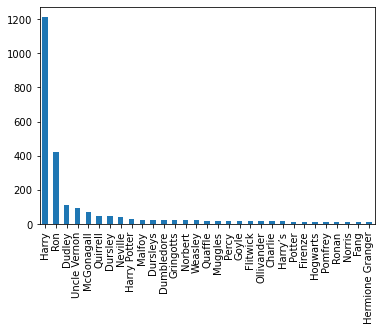

In [22]:
countDF = pd.Series(count.values(),index = count.keys())
countDF[lambda x: x > 10].sort_values(ascending=False).plot(kind = 'bar')

In [110]:
target_character = list(countDF[lambda x: x > 10].index)
# target_character = []

In [111]:
target_character

['Dursley',
 'Dudley',
 'Dursleys',
 'Potter',
 'Harry',
 'McGonagall',
 'Muggles',
 'Dumbledore',
 'Pomfrey',
 'Harry Potter',
 'Uncle Vernon',
 'Harry’s',
 'Hogwarts',
 'Gringotts',
 'Quirrell',
 'Ollivander',
 'Percy',
 'Ron',
 'Charlie',
 'Hermione Granger',
 'Goyle',
 'Malfoy',
 'Weasley',
 'Neville',
 'Norris',
 'Flitwick',
 'Fang',
 'Quaffle',
 'Norbert',
 'Ronan',
 'Firenze']

In [25]:
# characters_cleaned = ['Ronan', 'Dursleys', 'Dumbledore', 'Aunt Petunia', 'Hooch', 'Hedwig',
#        'Crabbe', 'Potter', 'Filch', 'Weasley', 'Fred', 'Hermione',
#        'Hagrid', 'McGonagall', 'Fang', 'Uncle', 'Petunia',
#        'George', 'Uncle Vernon', 'Ron', 'Goyle', 'Quirrell', 'Norbert',
#        'Hermione Granger', 'Pomfrey', 'Percy', 'Harry Potter',
#        'Snape', 'Malfoy', 'Dursley', 'Flitwick', 'Ollivander',
#        'Charlie', 'Harry', 'Dudley']
def filter_characters (characters, ents):
    return [ent for ent in ents if ent in characters]
def replace_names (dictionary,ent):
    if ent in dictionary.keys():
        ent  = dictionary[ent] 
        return ent
    else:
        return ent

In [137]:
# del sent_ents_filtered["Characters_Cleaned"]

In [146]:
sent_ents_filtered.characters

0              [Dursley]
2              [Dursley]
4              [Dursley]
5               [Dudley]
6             [Dursleys]
              ...       
6519    [Harry, Weasley]
6520      [Uncle Vernon]
6523        [Harry, Ron]
6525      [Uncle Vernon]
6527             [Harry]
Name: characters, Length: 2339, dtype: object

In [145]:
# sent_ents_filtered.loc[:,"characters"].apply(lambda x: filter_characters(target_character,x))

0              [Dursley]
2              [Dursley]
4              [Dursley]
5               [Dudley]
6             [Dursleys]
              ...       
6519    [Harry, Weasley]
6520      [Uncle Vernon]
6523        [Harry, Ron]
6525      [Uncle Vernon]
6527             [Harry]
Name: characters, Length: 2339, dtype: object

In [147]:
sent_ents_filtered["Characters_Cleaned"] = sent_ents_filtered["characters"].apply(lambda x: filter_characters(target_character,x))

In [152]:
replacement_dict_book1 = {"Potter":"Harry", 
                          "Harry Potter": "Harry",
                          "Hermione Granger":"Hermione",
                          "Weasley":"Ron","Uncle":"Uncle Vernon", 
                          "Dursley":"Mr or Mrs Dursley", 
                          "Dursleys":"Mr or Mrs Dursley","Harry’s": "Harry"
                         }

sent_ents_filtered["Finished_Characters"] = sent_ents_filtered.Characters_Cleaned.apply(lambda x: [replace_names(replacement_dict_book1,ent) for ent in x])

In [154]:
# for i in sent_ents_filtered["Finished_Characters"]:
#     if "Harry" in i :
#         print(i)

In [69]:
window_size = 5
relationships = []
for i in range(sent_ents_filtered.index[-1]): #get len of dataset len function would work too !!
    end_i = min(i+window_size,sent_ents_filtered.index[-1]) # 以防超出index长度
#     print(end_i)
    char_list = sum((sent_ents_filtered.loc[i:end_i].Finished_Characters),[])
#     print(char_list)
    # 相邻的两个相同的角色不计算
    char_unique = [char_list[i] for i in range(len(char_list)) if (i==0) or char_list[i]!= char_list[i-1]]

    if len (char_unique)> 1:
        for idx, source in enumerate(char_unique[:-1]):
            target = char_unique [idx+1]
            # DiGraph
#             relationships.append({"source" : source, "target" : target})
            # Graph
            if source < target:
                relationships.append({"source" : source, "target" : target})
            else:
                relationships.append({"source" : target, "target" : source})

In [158]:
sent_ents_filtered.loc[0:5].Finished_Characters

0    [Mr or Mrs Dursley]
2    [Mr or Mrs Dursley]
4    [Mr or Mrs Dursley]
5               [Dudley]
Name: Finished_Characters, dtype: object

In [71]:
sum(sent_ents_filtered.loc[0:7].Finished_Characters,[])

['Mr or Mrs Dursley',
 'Mr or Mrs Dursley',
 'Mr or Mrs Dursley',
 'Dudley',
 'Mr or Mrs Dursley']

In [72]:
relationships_df = pd.DataFrame(relationships)
def create_weights(df):
    df["value"] = 1 # we need a 1 as a numerical value since we will group by source target and aggregate it with a sum function
                    #its essential to name this column value otherwise the pyvis visualization wont work
    df = df.groupby(["source","target"], sort = False, as_index = False).sum()
    return df
relationships_df = create_weights(relationships_df)

In [73]:
relationships_df

,source,target,value
0,Dudley,Mr or Mrs Dursley,82
1,Harry,Mr or Mrs Dursley,155
2,McGonagall,Muggles,11
3,Dumbledore,Muggles,7
4,McGonagall,Pomfrey,5
...,...,...,...
93,Dumbledore,Malfoy,1
94,Dumbledore,Pomfrey,5
95,Hogwarts,Percy,4
96,Hermione,Percy,1


In [74]:
relationships_df[relationships_df["source"].isin(["Harry", "Dursleys"])]

,source,target,value
1,Harry,Mr or Mrs Dursley,155
5,Harry,McGonagall,267
8,Harry,Muggles,58
10,Harry,Uncle Vernon,398
13,Harry,Hogwarts,42
18,Harry,Quirrell,230
21,Harry,Ollivander,98
24,Harry,Percy,57
25,Harry,Ron,2154
29,Harry,Hermione,36


In [75]:
nx_graph = nx.from_pandas_edgelist(relationships_df,
                                  source = "source",
                                  target = "target",
                                  edge_attr = "value"
                                  ) 

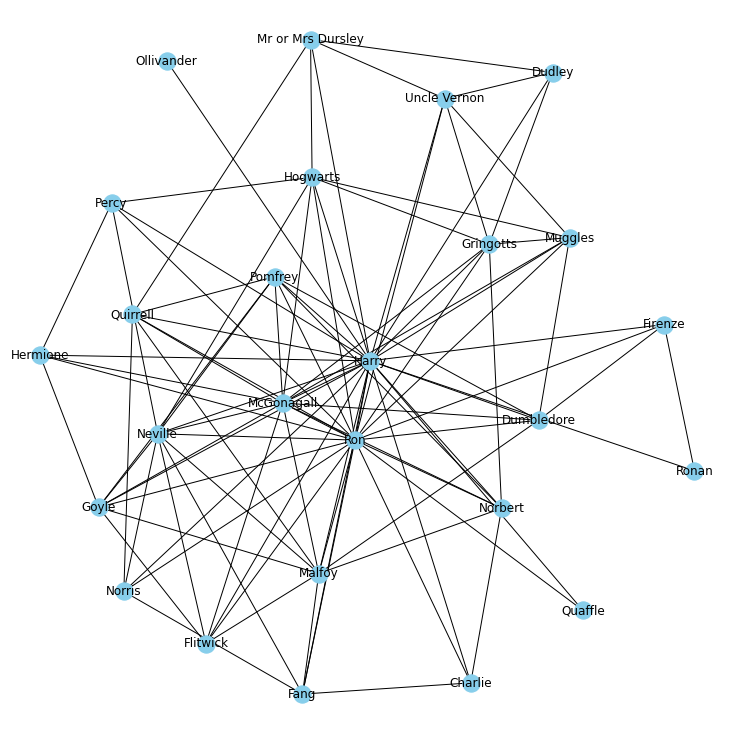

In [76]:
plt.figure(figsize = (10,10))
layout = nx.kamada_kawai_layout(nx_graph)
nx.draw(nx_graph, with_labels=True, node_color = "skyblue",edge_cmap = plt.cm.Blues, pos=layout)
plt.show()

In [77]:
from pyvis.network import Network
network = Network(notebook = True, width = "1000px", height = "700px", bgcolor = "#222222", font_color="white" )
network.from_nx(nx_graph)
network.show("Harry_Potter_Book1.html")

In [159]:
#change nodesize depending on degeree of node (how many edges)
node_degree = dict(nx_graph.degree)
node_degree

{'Dudley': 4,
 'Mr or Mrs Dursley': 5,
 'Harry': 25,
 'McGonagall': 14,
 'Muggles': 7,
 'Dumbledore': 7,
 'Pomfrey': 8,
 'Uncle Vernon': 6,
 'Hogwarts': 8,
 'Gringotts': 8,
 'Quirrell': 7,
 'Ollivander': 1,
 'Percy': 5,
 'Ron': 21,
 'Charlie': 4,
 'Hermione': 5,
 'Goyle': 8,
 'Malfoy': 10,
 'Neville': 11,
 'Norris': 5,
 'Flitwick': 6,
 'Fang': 6,
 'Quaffle': 2,
 'Norbert': 7,
 'Ronan': 2,
 'Firenze': 4}

In [160]:
network = Network(notebook = True, width = "1000px", height = "700px", bgcolor = "#222222", font_color="white" )
nx.set_node_attributes(nx_graph, node_degree, "size")
network.from_nx(nx_graph)

network.show("Harry_Potter_Book1.html")

In [161]:
# import community as community_louvain

import community.community_louvain as community_louvain
communities = community_louvain.best_partition(nx_graph)
communities

{'Dudley': 0,
 'Mr or Mrs Dursley': 0,
 'Harry': 3,
 'McGonagall': 2,
 'Muggles': 0,
 'Dumbledore': 3,
 'Pomfrey': 2,
 'Uncle Vernon': 0,
 'Hogwarts': 0,
 'Gringotts': 0,
 'Quirrell': 1,
 'Ollivander': 3,
 'Percy': 1,
 'Ron': 1,
 'Charlie': 1,
 'Hermione': 1,
 'Goyle': 2,
 'Malfoy': 2,
 'Neville': 2,
 'Norris': 1,
 'Flitwick': 2,
 'Fang': 1,
 'Quaffle': 3,
 'Norbert': 2,
 'Ronan': 3,
 'Firenze': 3}

In [162]:
nx.set_node_attributes(nx_graph, communities, "group")
network = Network(notebook = True, width = "1000px", height = "700px", bgcolor = "#222222", font_color="white" )
network.from_nx(nx_graph)

network.show("Harry_Potter_Book1.html")
#network.save_graph("Harry_Potter_Book1.html")